In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential

#import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

2025-06-05 07:36:37.463131: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-05 07:36:37.463187: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-05 07:36:37.463241: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-05 07:36:37.472522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)


In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels
df.head(10)

,VisitDuration,PagesVisited,Purchase
0,0.548814,0.715189,1
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,1
4,0.963663,0.383442,1
5,0.791725,0.528895,1
6,0.568045,0.925597,1
7,0.071036,0.087129,0
8,0.020218,0.832620,0
9,0.778157,0.870012,1


In [4]:
# Split the data
X = df[['VisitDuration', 'PagesVisited']]
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and Train the Neural Network

In [5]:
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10


2025-06-05 07:36:39.082318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


13/13 [==============================] - 1s 13ms/step - loss: 0.6636 - accuracy: 0.5547 - val_loss: 0.6403 - val_accuracy: 0.5938
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.5703 - val_loss: 0.6366 - val_accuracy: 0.6562
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.5859 - val_loss: 0.6327 - val_accuracy: 0.7500
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.6328 - val_loss: 0.6291 - val_accuracy: 0.7812
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6406 - val_loss: 0.6255 - val_accuracy: 0.8125
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.6484 - val_loss: 0.6220 - val_accuracy: 0.8125
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6797 - val_loss: 0.6187 - val_accuracy: 0.7812
Epoch 8/10
13/13 [============

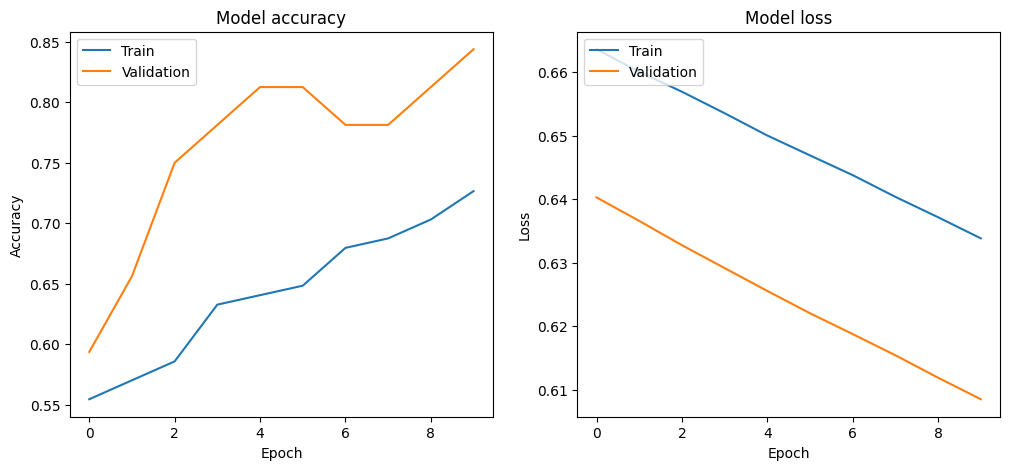

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [7]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7750
Test Accuracy: 0.7749999761581421


313/313 [==============================] - 0s 728us/step


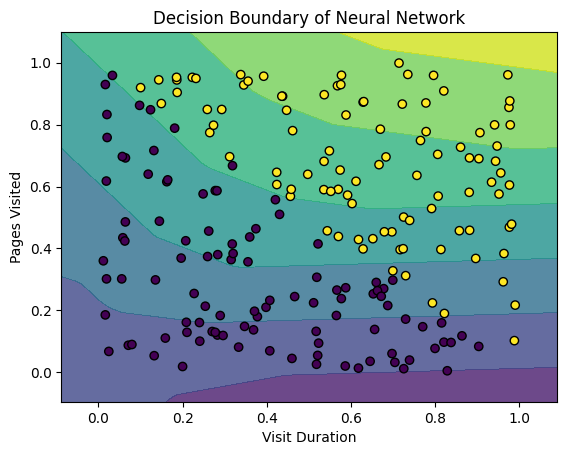

In [8]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()